### **Logistic Regression Intuition**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyArrowPatch
from sklearn.linear_model import LogisticRegression



### Dataset loading

In [9]:
dataset = pd.read_csv('F:\\OneDrive - Shahjalal University of Science and Technology\\Windows\\Desktop\\ML assignments\\data.txt', header=None)




In [10]:

features_columns = [0, 1]
X_train = dataset.iloc[:, features_columns].values

target_column = 2
y_train = dataset.iloc[:, target_column].values


In [11]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )          
    g = 1.0/(1.0+np.exp(-z))
    return g

(100,)


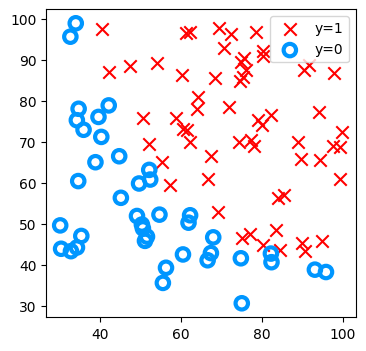

In [12]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
print(pos.shape)


ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

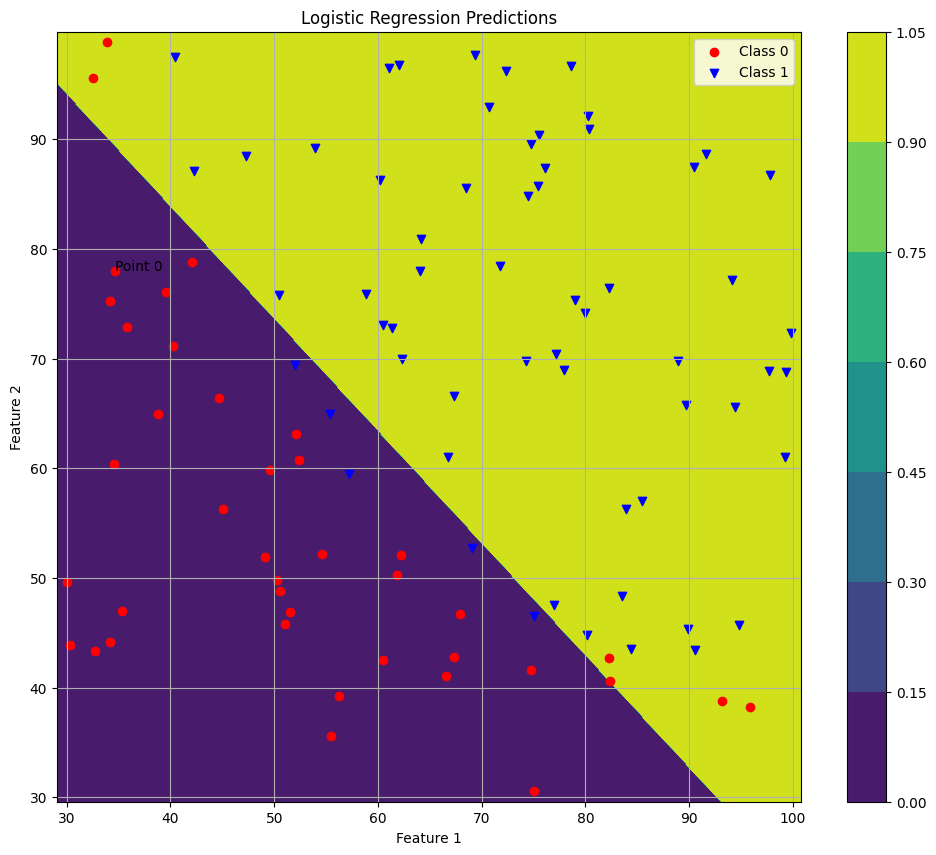

In [14]:
plt.figure(figsize=(12, 10))

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

x1_scale = np.arange(x1_min, x1_max, 0.1)  # This line was missing
x2_scale = np.arange(x2_min, x2_max, 0.1)

x1_grid, x2_grid = np.meshgrid(x1_scale, x2_scale)

x1_vector = x1_grid.flatten().reshape(-1, 1)
x2_vector = x2_grid.flatten().reshape(-1, 1)

input_grid = np.hstack((x1_vector, x2_vector))

predictions = model.predict(input_grid)

predictions_grid = predictions.reshape(x1_grid.shape)
contour = plt.contourf(x1_grid, x2_grid, predictions_grid, cmap='viridis')

plt.colorbar(contour)
plt.title('Logistic Regression Predictions')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'gray', 'brown', 'cyan']
markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for class_val in np.unique(y_train):
    plt.scatter(X_train[y_train == class_val, 0], X_train[y_train == class_val, 1], 
                color=colors[class_val % len(colors)], marker=markers[class_val % len(markers)], 
                label=f'Class {class_val}')


plt.grid(True)


plt.legend()

for i in range(0, X_train.shape[0], 200): 
    plt.annotate(f'Point {i}', (X_train[i, 0], X_train[i, 1]))


plt.show()